In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
#Wczytywanie danych
df = pd.read_csv(r'C:\Users\dawid\OneDrive\Pulpit\Electric_Vehicle_Population_Data.csv')

In [47]:
# Wizualizacja danych
display(df)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10


In [48]:
# Typy danych kolumn
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# Usuwanie danych bez wartości


In [3]:
# Usuwanie rekordów bez żadnych wartości w kolumnie Electric Range 
def delete_records_without_values(df, column_name):
    df = df[df[column_name] != 0].reset_index(drop=True)
    return df
df = delete_records_without_values(df, 'Electric Range')

# Wyświetlanie danych po usunięciu 
indeksy_zerowych_danych = df.index[df['Electric Range'] == 0].tolist()

if indeksy_zerowych_danych:
    print(f"Zerowe dane występują na indeksach: {indeksy_zerowych_danych}")
else:
    print("W kolumnie nie ma zerowych danych.")
df.head()

W kolumnie nie ma zerowych danych.


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5UX43EU02R,Kitsap,Poulsbo,WA,98370.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,23.0,259427829,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303594e+10


# Usuwanie niepotrzebnych kolumn

In [4]:
#Usuwanie niepotrzebnych danych 

df.drop(['Base MSRP', 'VIN (1-10)', 'DOL Vehicle ID', '2020 Census Tract', 
         'Electric Utility', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis=1)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Legislative District,Vehicle Location
0,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),87,14.0,POINT (-120.524012 46.5973939)
1,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),200,2.0,POINT (-122.817545 46.98876)
2,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),20,11.0,POINT (-122.1298876 47.4451257)
3,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,33.0,POINT (-122.2012521 47.3931814)
4,Kitsap,Poulsbo,WA,98370.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),39,23.0,POINT (-122.64177 47.737525)
...,...,...,...,...,...,...,...,...,...,...,...
83278,Whatcom,Bellingham,WA,98225.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),21,42.0,POINT (-122.486115 48.761615)
83279,Skagit,Anacortes,WA,98221.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75,10.0,POINT (-122.615305 48.501275)
83280,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),19,6.0,POINT (-117.369705 47.62637)
83281,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38,20.0,POINT (-122.487535 46.5290135)


# Obliczenia 

In [88]:
# Obliczanie średniej zasięgu wszystkich samochodów 


#------------------------------------------------------------------------------------------------------
#Średni zasięg wszystkich samochodów elektrycznych i hybrydowych zależnie od typu 
def calculate_range_statistics_for_type(df, typ_pojazdu):
    
    miles_to_kilometers = 1.60934  
    
    specific_type_df = df[df['Electric Vehicle Type'] == vehicle_type]
    mean_range_miles = specific_type_df['Electric Range'].mean()
    min_range_miles = specific_type_df['Electric Range'].min()
    max_range_miles = specific_type_df['Electric Range'].max()

    mean_range_kilometers = mean_range_miles * miles_to_kilometers
    min_range_kilometers = min_range_miles * miles_to_kilometers
    max_range_kilometers = max_range_miles * miles_to_kilometers

    return (mean_range_miles, min_range_miles, max_range_miles,
            mean_range_kilometers, min_range_kilometers, max_range_kilometers)

vehicle_type = 'Plug-in Hybrid Electric Vehicle (PHEV)'
mean_miles, min_miles, max_miles, mean_kilometers, min_kilometers, max_kilometers = calculate_range_statistics_for_type(df, typ_pojazdu)

print(f"Średni zasięg dla samochodów typu {vehicle_type} w {mean_miles:.2f} mil. i w kilometrach {mean_kilometers:.2f} km.")
print(f"Minimalny zasięg dla samochodów typu {vehicle_type} w milach: {min_miles:.2f} mil. i w kilometrach {min_kilometers:.2f} km.")
print(f"Maksymalny zasięg dla samochodów typu {vehicle_type} w milach: {max_miles:.2f} mil. i w kilometrach {max_kilometers:.2f} km.\n")

vehicle_type = 'Battery Electric Vehicle (BEV)'
mean_miles, min_miles, max_miles, mean_kilometers, min_kilometers, max_kilometers = calculate_range_statistics_for_type(df, typ_pojazdu)

print(f"Średni zasięg dla samochodów typu {vehicle_type} w milach: {mean_miles:.2f} mil. i w kilometrach {mean_kilometers:.2f} km.")
print(f"Minimalny zasięg dla samochodów typu {vehicle_type} w milach: {min_miles:.2f} mil. i w kilometrach {min_kilometers:.2f} km.")
print(f"Maksymalny zasięg dla samochodów typu {vehicle_type} w milach: {max_miles:.2f} mil. i w kilometrach {max_kilometers:.2f} km.")


W kolumnie nie ma zerowych danych.
Średni zasięg dla samochodów typu Plug-in Hybrid Electric Vehicle (PHEV) w 30.69 mil. i w kilometrach 49.39 km.
Minimalny zasięg dla samochodów typu Plug-in Hybrid Electric Vehicle (PHEV) w milach: 6.00 mil. i w kilometrach 9.66 km.
Maksymalny zasięg dla samochodów typu Plug-in Hybrid Electric Vehicle (PHEV) w milach: 153.00 mil. i w kilometrach 246.23 km.

Średni zasięg dla samochodów typu Battery Electric Vehicle (BEV) w milach: 195.38 mil. i w kilometrach 314.44 km.
Minimalny zasięg dla samochodów typu Battery Electric Vehicle (BEV) w milach: 29.00 mil. i w kilometrach 46.67 km.
Maksymalny zasięg dla samochodów typu Battery Electric Vehicle (BEV) w milach: 337.00 mil. i w kilometrach 542.35 km.


# Mediana, Odchylenie standardowe, Wariancja

In [74]:
# Dla Battery Electric Vehicle (BEV)
median_range_bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].median()
std_dev_range_bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].std()
var_range_bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].var()
# Dla Plug-in Hybrid Electric Vehicle (PHEV)
median_range_phev = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].median()
std_dev_range_phev = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].std()
var_range_phev = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].var()
print(F"Samochody elektryczne: Mediana {median_range_bev}, Odchylenie standardowe {std_dev_range_bev}, Wariancja {var_range_bev} \n")
print(F"Samochody hybrydowe: Mediana {median_range_phev}, Odchylenie standardowe {std_dev_range_phev}, Wariancja {var_range_phev}")


Samochody elektryczne: Mediana 215.0, Odchylenie standardowe 73.51982519830419, Wariancja 5405.164697189204 

Samochody hybrydowe: Mediana 26.0, Odchylenie standardowe 15.953833009252225, Wariancja 254.52478768710588


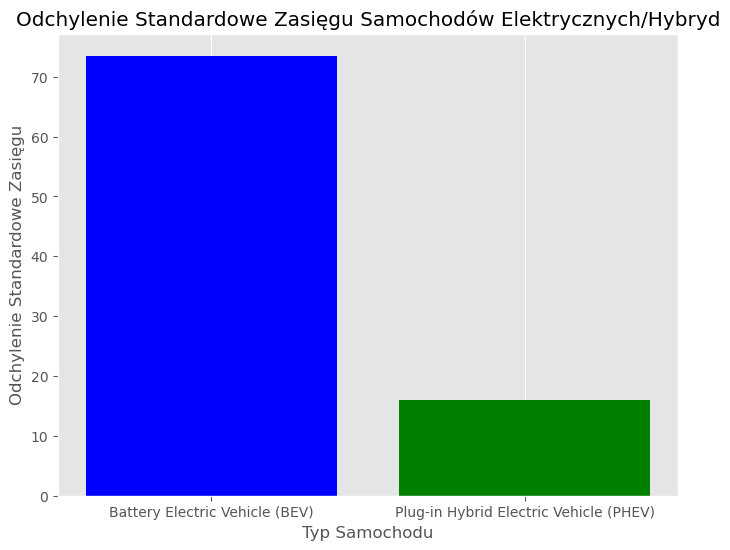

In [5]:
df_electric = df[df['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Grupuj dane po typie samochodu elektrycznego i oblicz odchylenie standardowe
std_dev_df = df_electric.groupby('Electric Vehicle Type')['Electric Range'].std().reset_index()

# Stwórz wykres słupkowy
plt.figure(figsize=(8, 6))
plt.bar(std_dev_df['Electric Vehicle Type'], std_dev_df['Electric Range'], color=['blue', 'green'])

# Dostosuj wygląd wykresu
plt.title('Odchylenie Standardowe Zasięgu Samochodów Elektrycznych/Hybryd')
plt.xlabel('Typ Samochodu')
plt.ylabel('Odchylenie Standardowe Zasięgu')
plt.grid(axis='y')
plt.show()

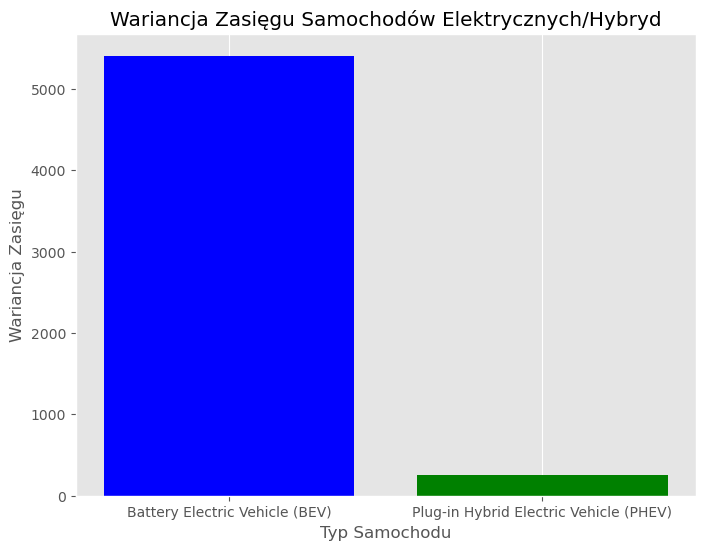

In [7]:
df_electric = df[df['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Grupuj dane po typie samochodu elektrycznego i oblicz odchylenie standardowe
var_dev_df = df_electric.groupby('Electric Vehicle Type')['Electric Range'].var().reset_index()

# Stwórz wykres słupkowy
plt.figure(figsize=(8, 6))
plt.bar(var_dev_df['Electric Vehicle Type'], var_dev_df['Electric Range'], color=['blue', 'green'])

# Dostosuj wygląd wykresu
plt.title('Wariancja Zasięgu Samochodów Elektrycznych/Hybryd')
plt.xlabel('Typ Samochodu')
plt.ylabel('Wariancja Zasięgu')
plt.grid(axis='y')
plt.show()

# Wykres dla marki samochodów

In [5]:
number_of_models = df['Make'].value_counts().reset_index()
number_of_models.columns = ['Make', 'Count']

number_of_models['Percentage'] = (number_of_models['Count'] / number_of_models['Count'].sum()) * 100

filtered_models = number_of_models[number_of_models['Percentage'] > 0.5]

fig = px.pie(filtered_models, values='Count', names='Make', title='Procentowy wykres dla marki samochodu (powyżej 0,5%)',
             labels={'Count': 'Number of Cars'},
             hover_name='Make',
             color_discrete_sequence=px.colors.qualitative.Set2,
             hole=0.1,
             )
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    showlegend=True,
    legend_title_text='Car Brand (Above 0.5%)',
    margin=dict(l=1, r=1, b=0, t=40),
)
fig.show()

In [14]:
number_of_cars_based_by_model_type= df['Make'].value_counts()
print("Liczba samochodów zależnie od marki :")
display(number_of_cars_based_by_model_type)

Liczba samochodów zależnie od marki :


Make
TESLA                   74834
NISSAN                  13848
CHEVROLET               13072
FORD                     8577
BMW                      7196
KIA                      6995
TOYOTA                   5812
VOLKSWAGEN               4717
JEEP                     4100
HYUNDAI                  4057
VOLVO                    3962
RIVIAN                   3554
AUDI                     3464
CHRYSLER                 2878
MERCEDES-BENZ            1342
PORSCHE                  1097
MITSUBISHI                941
MINI                      854
POLESTAR                  853
HONDA                     821
FIAT                      801
SUBARU                    788
MAZDA                     384
LEXUS                     307
SMART                     275
LINCOLN                   254
CADILLAC                  245
LUCID                     231
JAGUAR                    221
GENESIS                   161
LAND ROVER                 53
ALFA ROMEO                 29
DODGE                      28
FISKE

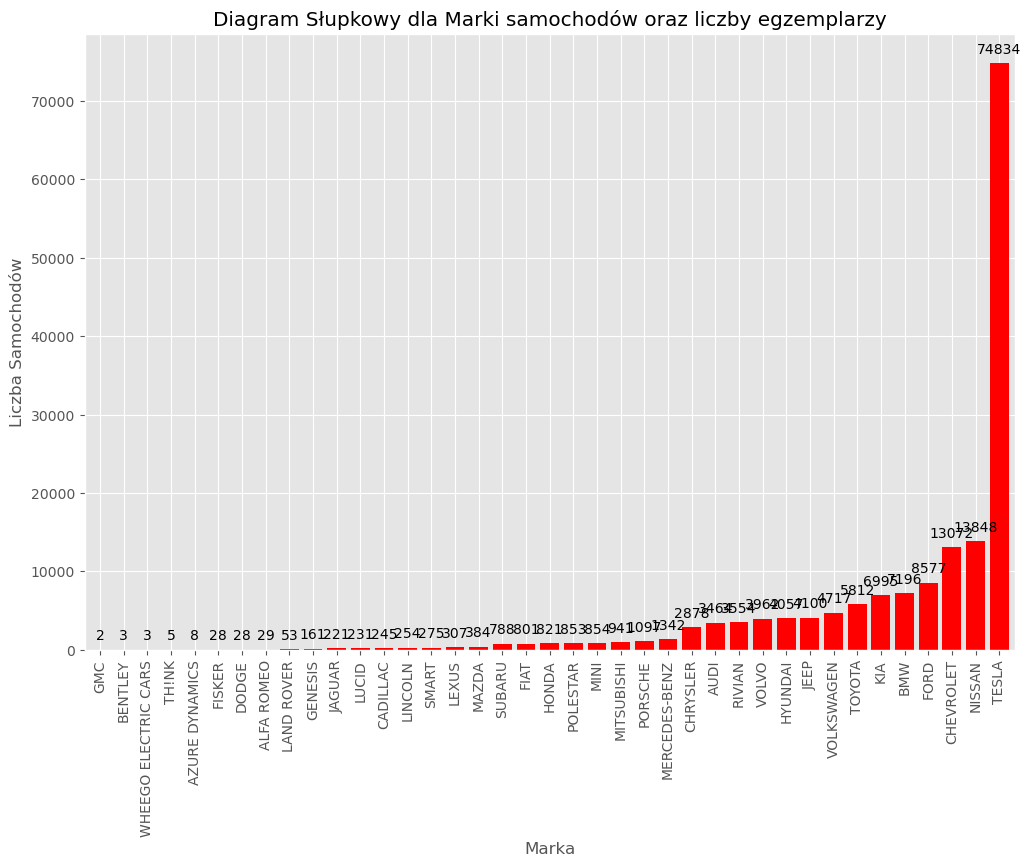

In [15]:
ax = df['Make'].value_counts().sort_values().plot(kind='bar', color='red', width=0.8)

# Dodaj etykiety z ilością samochodów nad każdym słupkiem
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Diagram Słupkowy dla Marki samochodów oraz liczby egzemplarzy')
plt.xlabel('Marka')
plt.ylabel('Liczba Samochodów')
plt.show()

# Wykres dla modeli samochodów

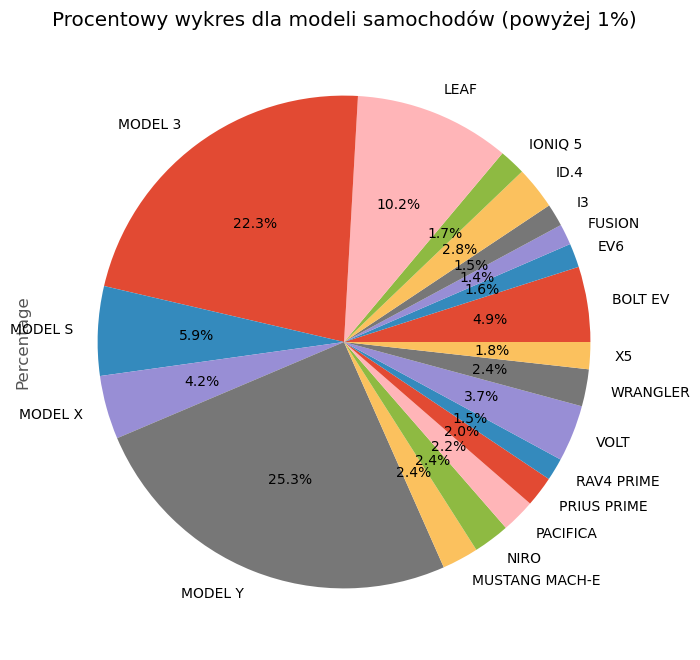

In [28]:
number_of_models = df.groupby('Model').size().reset_index(name='Count')

# Obliczanie procentów
number_of_models['Percentage'] = (number_of_models['Count'] / number_of_models['Count'].sum()) * 100

# Filtrowanie modeli o procentowej liczbie większej niż 1%
filtered_models = number_of_models[number_of_models['Percentage'] > 1]

# Utworzenie wykresu
fig, ax = plt.subplots(figsize=(8, 8))
filtered_models.plot.pie(y='Percentage', labels=filtered_models['Model'], autopct='%1.1f%%', legend=False, ax=ax)

# Wyrównanie danych
plt.title('Procentowy wykres dla modeli samochodów (powyżej 1%)')
plt.show()

# Diagramy samochodów typu BEV i PHEV

In [103]:
electric_cars = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
brand_and_quantity_of_electric_cars = electric_cars['Make'].value_counts().sort_values(ascending=False)
print("Samochody Elektryczne")
print("Marka samochodów oraz jej ilość: ")
display(brand_and_quantity_of_electric_cars)

Samochody Elektryczne
Marka samochodów oraz jej ilość: 


Make
TESLA             25258
NISSAN            10827
CHEVROLET          4356
KIA                1460
VOLKSWAGEN         1070
FIAT                801
AUDI                739
BMW                 558
HYUNDAI             290
SMART               275
FORD                247
PORSCHE             217
JAGUAR              192
POLESTAR            142
MINI                120
MERCEDES-BENZ        91
MITSUBISHI           63
TOYOTA               57
AZURE DYNAMICS        8
TH!NK                 5
Name: count, dtype: int64

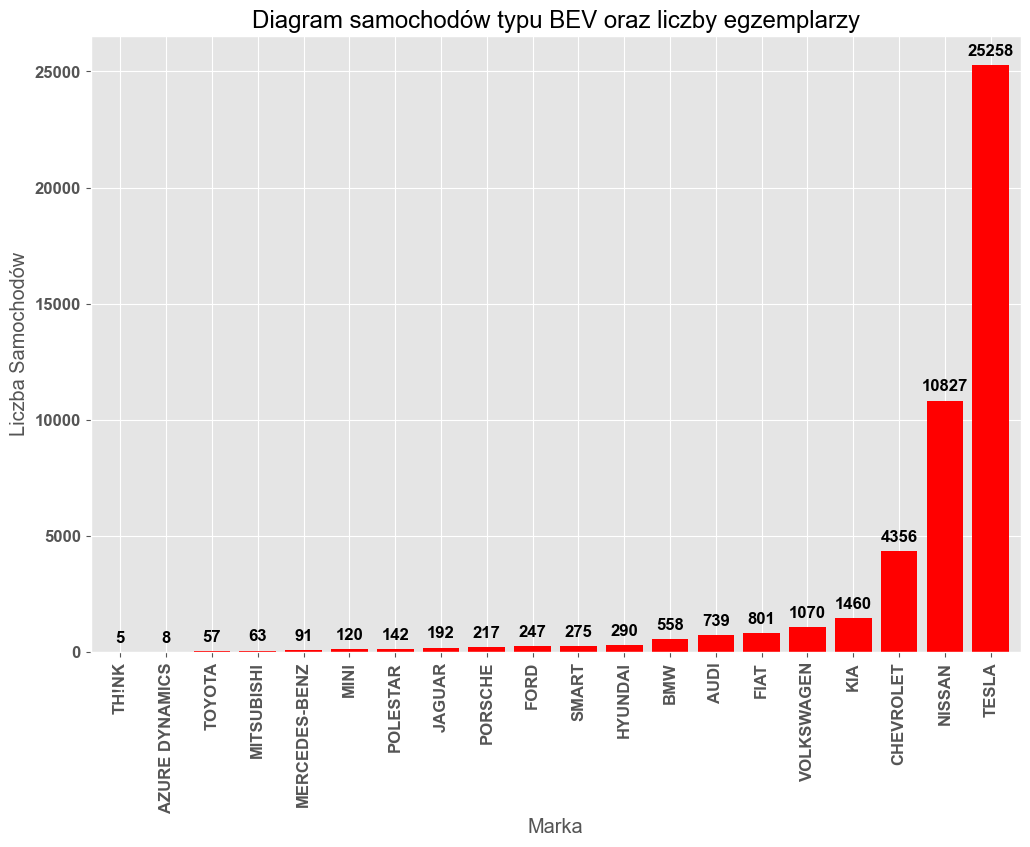

In [95]:
electric_cars = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

ax = electric_cars['Make'].value_counts().sort_values().plot(kind='bar', color='red', width=0.8)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Diagram samochodów typu BEV oraz liczby egzemplarzy')
plt.xlabel('Marka')
plt.ylabel('Liczba Samochodów')
plt.show()

In [98]:
hybrid_cars = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
brand_and_quantity_of_hybrid_cars = hybrid_cars['Make'].value_counts().sort_values(ascending=False)
print("Samochody Hybrydowe: \n")
print("Marka samochodów oraz jej ilość: ")
display(brand_and_quantity_of_hybrid_cars)

Samochody Hybrydowe: 

Marka samochodów oraz jej ilość: 


Make
TOYOTA                  5527
BMW                     4904
CHEVROLET               4825
JEEP                    4100
FORD                    3657
CHRYSLER                2878
VOLVO                   2597
KIA                     2296
AUDI                    1386
MITSUBISHI               878
HONDA                    821
HYUNDAI                  578
PORSCHE                  489
MAZDA                    382
MERCEDES-BENZ            266
LINCOLN                  254
MINI                     218
LEXUS                    161
CADILLAC                  92
SUBARU                    67
LAND ROVER                53
ALFA ROMEO                29
DODGE                     28
FISKER                    15
WHEEGO ELECTRIC CARS       3
BENTLEY                    3
Name: count, dtype: int64

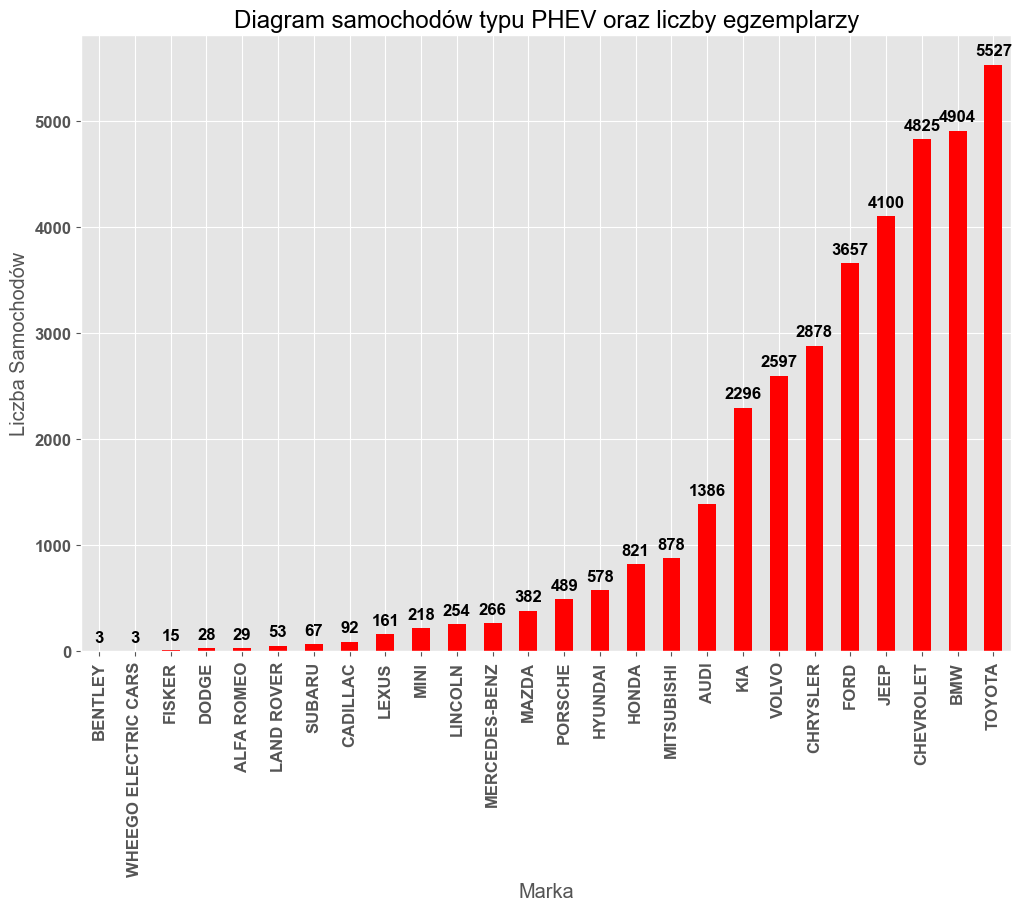

In [94]:
hybrid_cars = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

ax = hybrid_cars['Make'].value_counts().sort_values().plot(kind='bar', color='red')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Diagram samochodów typu PHEV oraz liczby egzemplarzy')
plt.xlabel('Marka')
plt.ylabel('Liczba Samochodów')
plt.show()

# Wykres liniowy dla liczby samochodów i roku produkcji

In [104]:
number_of_cars_based_by_year_production = df['Model Year'].value_counts().sort_values(ascending=False)
print("Liczba samochodów dla roku produkcji:")
display(number_of_cars_based_by_year_production)

Liczba samochodów dla roku produkcji:


Model Year
2018    14151
2020    11366
2019    10857
2017     8523
2023     6889
2016     5518
2015     4833
2013     4455
2022     4340
2021     4330
2014     3539
2024     2012
2012     1630
2011      782
2010       23
2008       20
2000        7
1999        3
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

In [4]:
number_of_cars_based_by_year_production = df['Model Year'].value_counts().sort_index().reset_index()
number_of_cars_based_by_year_production.columns = ['Model Year', 'Number of Cars']


fig = px.line(number_of_cars_based_by_year_production, x='Model Year', y='Number of Cars', 
              title='Liczba samochodów dla poszczególnych lat produkcji:',
              labels={'Model Year': 'Rok Produkcji', 'Number of Cars': 'Liczba Samochodów'})

fig.show()